In [50]:
#using RNN
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [86]:
train= pd.read_csv('Train_SU63ISt.csv',index_col='Datetime',parse_dates=True)



In [125]:
test=pd.read_csv('Test_0qrQsBZ.csv',index_col='Datetime',parse_dates=True)

In [87]:

train=train.drop(['ID'],axis=1)

In [88]:
train
test

""
Datetime
2014-09-26 00:00:00
2014-09-26 01:00:00
2014-09-26 02:00:00
2014-09-26 03:00:00
2014-09-26 04:00:00
...
2015-04-26 19:00:00
2015-04-26 20:00:00
2015-04-26 21:00:00


In [89]:
train.index.infer_freq='MS'
test.index.infer_freq='MS'

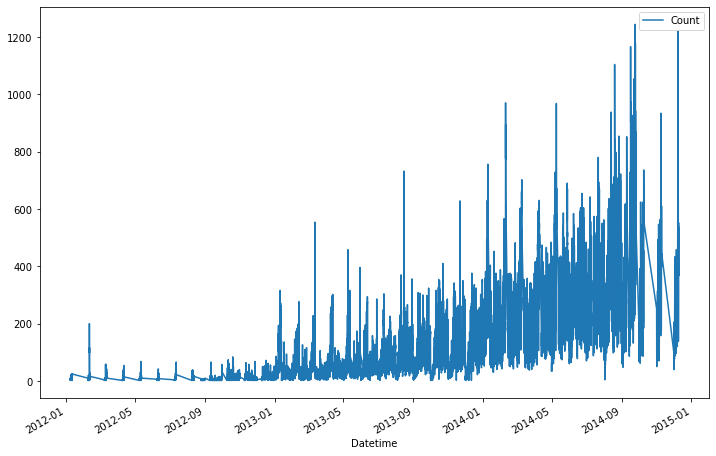

In [90]:
train.plot(figsize=(12,8))

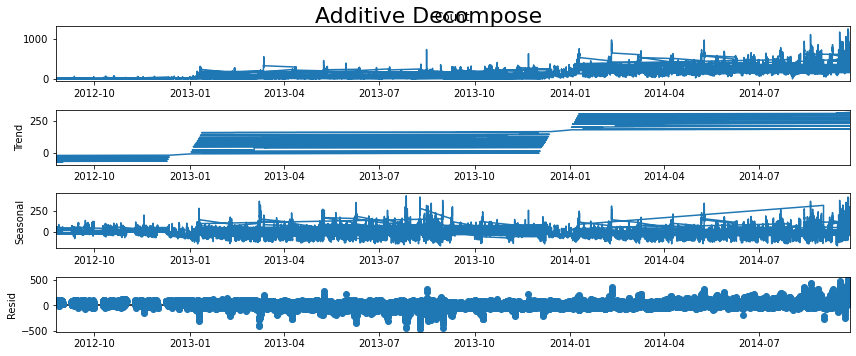

In [91]:
result_add = seasonal_decompose(x=train['Count'], model='additive', extrapolate_trend='freq', period=int(len(train)/2))
plt.rcParams.update({'figure.figsize': (12,5)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [92]:
from sklearn.preprocessing import MinMaxScaler

In [93]:
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)

In [94]:
from keras.preprocessing.sequence import TimeseriesGenerator
scaled_train


array([[0.00483092],
       [0.        ],
       [0.00322061],
       ...,
       [0.56360709],
       [0.46537842],
       [0.42834138]])

In [95]:
# define generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [96]:
len(scaled_train)

18288

In [97]:
len(generator) # n_input = 2

18286

In [98]:
# What does the first batch look like?
X,y = generator[0]

In [99]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00483092 0.        ]
Predict this y: 
 [[0.00322061]]


In [100]:
train

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2
...,...
2014-09-25 19:00:00,868
2014-09-25 20:00:00,732
2014-09-25 21:00:00,702


In [109]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [110]:
# What does the first batch look like?
X,y = generator[0]

In [111]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00483092 0.         0.00322061 0.         0.         0.
 0.         0.         0.00322061 0.         0.         0.00322061]
Predict this y: 
 [[0.00161031]]


In [112]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [113]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [114]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [115]:
# fit model
model.fit_generator(generator,epochs=10)

Epoch 1/10
18276/18276 [==============================] - 71s 4ms/step - loss: 0.0024
Epoch 2/10
18276/18276 [==============================] - 64s 4ms/step - loss: 0.0011
Epoch 3/10
18276/18276 [==============================] - 69s 4ms/step - loss: 9.5329e-04
Epoch 4/10
18276/18276 [==============================] - 68s 4ms/step - loss: 9.5976e-04
Epoch 5/10
18276/18276 [==============================] - 71s 4ms/step - loss: 8.4122e-04
Epoch 6/10
18276/18276 [==============================] - 68s 4ms/step - loss: 9.0699e-04
Epoch 7/10
18276/18276 [==============================] - 65s 4ms/step - loss: 9.2547e-04
Epoch 8/10
18276/18276 [==============================] - 74s 4ms/step - loss: 9.2960e-04
Epoch 9/10
18276/18276 [==============================] - 71s 4ms/step - loss: 8.2672e-04
Epoch 10/10
18276/18276 [==============================] - 68s 4ms/step - loss: 8.5287e-04


In [116]:
model.history.history.keys()


dict_keys(['loss'])

In [151]:
from matplotlib import pyplot

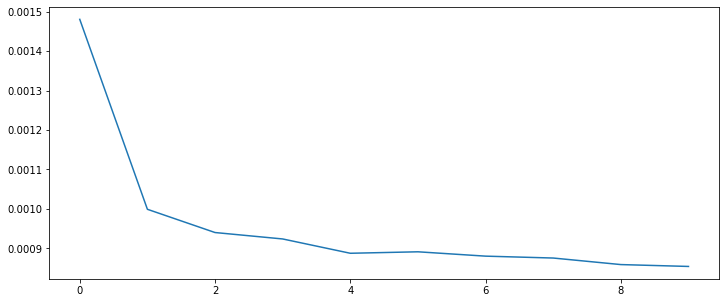

In [117]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [118]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [119]:
current_batch.shape


(1, 12, 1)

In [120]:
current_batch

array([[[0.5394525 ],
        [0.51529791],
        [0.49436393],
        [0.55072464],
        [0.52495974],
        [0.49919485],
        [0.54589372],
        [0.69726248],
        [0.58776167],
        [0.56360709],
        [0.46537842],
        [0.42834138]]])

In [121]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.51529791],
        [ 0.49436393],
        [ 0.55072464],
        [ 0.52495974],
        [ 0.49919485],
        [ 0.54589372],
        [ 0.69726248],
        [ 0.58776167],
        [ 0.56360709],
        [ 0.46537842],
        [ 0.42834138],
        [99.        ]]])

In [122]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [123]:
test_predictions


[array([0.39761478], dtype=float32),
 array([0.35881978], dtype=float32),
 array([0.31576163], dtype=float32),
 array([0.26716056], dtype=float32),
 array([0.23490912], dtype=float32),
 array([0.22865878], dtype=float32),
 array([0.28219303], dtype=float32),
 array([0.36472955], dtype=float32),
 array([0.46849394], dtype=float32),
 array([0.6537405], dtype=float32),
 array([0.7954286], dtype=float32),
 array([0.78578526], dtype=float32),
 array([0.6964168], dtype=float32),
 array([0.67439777], dtype=float32),
 array([0.6764108], dtype=float32),
 array([0.68132895], dtype=float32),
 array([0.687865], dtype=float32),
 array([0.6917099], dtype=float32),
 array([0.6874745], dtype=float32),
 array([0.6660401], dtype=float32),
 array([0.62742144], dtype=float32),
 array([0.55029213], dtype=float32),
 array([0.47710875], dtype=float32),
 array([0.41546264], dtype=float32),
 array([0.35437274], dtype=float32),
 array([0.30064613], dtype=float32),
 array([0.27116296], dtype=float32),
 array([0.

In [126]:
test

,ID
Datetime,
2014-09-26 00:00:00,18288
2014-09-26 01:00:00,18289
2014-09-26 02:00:00,18290
2014-09-26 03:00:00,18291
2014-09-26 04:00:00,18292
...,...
2015-04-26 19:00:00,23395
2015-04-26 20:00:00,23396
2015-04-26 21:00:00,23397


In [127]:
true_predictions = scaler.inverse_transform(test_predictions)

In [128]:
true_predictions

array([[ 495.83755314],
       [ 447.65417016],
       [ 394.1759392 ],
       ...,
       [1085.15500522],
       [1085.89907038],
       [1073.43333232]])

In [131]:

# IGNORE WARNINGS
test['Count'] = true_predictions

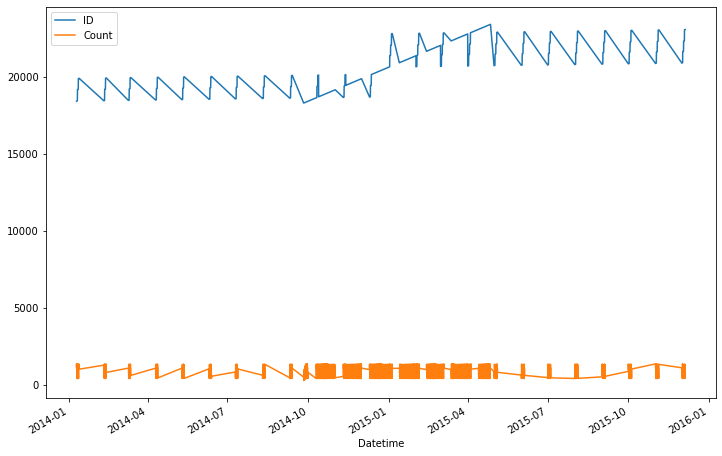

In [132]:
test.plot(figsize=(12,8))

In [133]:
test

,ID,Count
Datetime,,
2014-09-26 00:00:00,18288,495.837553
2014-09-26 01:00:00,18289,447.654170
2014-09-26 02:00:00,18290,394.175939
2014-09-26 03:00:00,18291,333.813421
2014-09-26 04:00:00,18292,293.757124
...,...,...
2015-04-26 19:00:00,23395,1075.401392
2015-04-26 20:00:00,23396,1078.232260
2015-04-26 21:00:00,23397,1085.155005


In [135]:
submission=test.copy()

In [136]:
submission.index=submission.ID

In [140]:
submission=submission.drop(['ID'],axis=1)

In [141]:
submission

,Count
ID,
18288,495.837553
18289,447.654170
18290,394.175939
18291,333.813421
18292,293.757124
...,...
23395,1075.401392
23396,1078.232260
23397,1085.155005


In [146]:
submission.to_csv('submission.csv',index=True)